# Working out Python, Pandas and visualization


The Radiation Dosimetry section from the NIST web page have the Stopping-Power and Range Tables for Electrons, Protons, and Helium Ions.
The Energies are specified in MeV, and must be in the range from 0.001 MeV to 10000 MeV.
NIST Standard Reference Database 1.2.4
url=https://www.nist.gov/pml/radiation-dosimetry-data

This simple exercise explains how easily works python and pandas.

First we load the basics libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import numpy as np

Now, load the csv file

In [2]:
df = pd.read_csv('stp_pow_H.csv')

Take a look at this dataframe

In [4]:
df.head()

,Kinetic Energy MeV,collision_stp_pow MeV cm2/g,radiative_stp_pow MeV cm2/g,total_stp_pow MeV cm2/g,Range cm2/g,radiation_yield,density_effect_parameter
0,0.0100,51.2,0.000970,51.2,0.000108,0.000010,0.0
1,0.0125,42.7,0.000979,42.7,0.000161,0.000012,0.0
2,0.0150,36.8,0.000988,36.8,0.000225,0.000014,0.0
3,0.0175,32.5,0.000996,32.5,0.000297,0.000017,0.0
4,0.0200,29.2,0.001000,29.2,0.000378,0.000018,0.0


**And very important** check what types do you have. We need float of course.

In [5]:
df.dtypes

Kinetic Energy MeV             float64
collision_stp_pow MeV cm2/g    float64
radiative_stp_pow MeV cm2/g    float64
total_stp_pow MeV cm2/g        float64
Range cm2/g                    float64
radiation_yield                float64
density_effect_parameter       float64
dtype: object

It seems that we are cool.

Let's check the data frame shape

In [6]:
df.shape

(81, 7)

## Now let's start the visualization part

We will reproduce the same graphic shown on the NIST web page,
the collision radiative and total stopping power Vs the kinetic energy in the same frame.

gca (global current axes) is for keep the same axe with different lines.

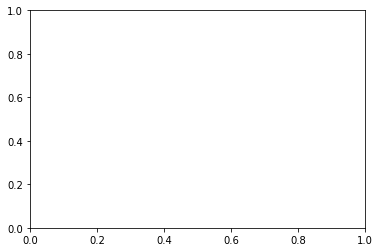

In [7]:
ax = plt.gca()

Now, plot the columns data frame. This is one way.
Remember fix the axes scale, for us is logarithmic.
Set the title and the axes labels.
Add a legend

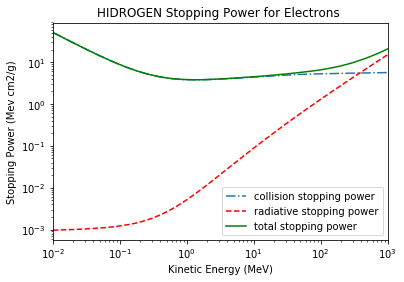

In [12]:
ax = df.plot(kind='line',x='Kinetic Energy MeV',y='collision_stp_pow MeV cm2/g',style='-.')
df.plot(kind='line',x='Kinetic Energy MeV',y='radiative_stp_pow MeV cm2/g',style='--',color='red',ax=ax)
df.plot(kind='line',x='Kinetic Energy MeV',y='total_stp_pow MeV cm2/g',color='green',ax=ax)
#fix the axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')
#set the title and the axes labels
ax.set_title('HIDROGEN Stopping Power for Electrons ')
ax.set_xlabel('Kinetic Energy (MeV)')
ax.set_ylabel('Stopping Power (Mev cm2/g)')
#add a legend
ax.legend(['collision stopping power','radiative stopping power','total stopping power'],loc='best')
#if you want to save the figure when you use -ax-
#must start with gcf(get current figure) because sometimes don't save directly
fig = plt.gcf()
fig.savefig('Hidrogen stopping power.png')
plt.show()

## Easy right?! 
